In [2]:
import numpy as np
import matplotlib.pyplot as plt

11
106


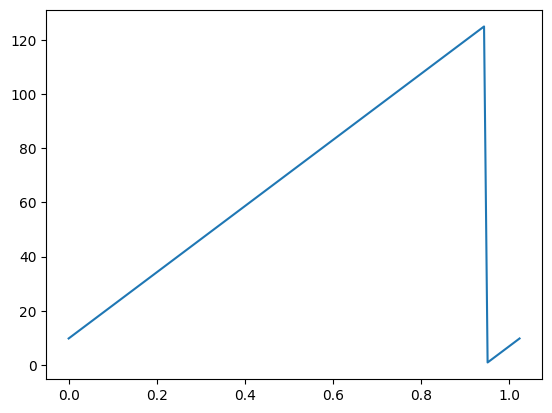

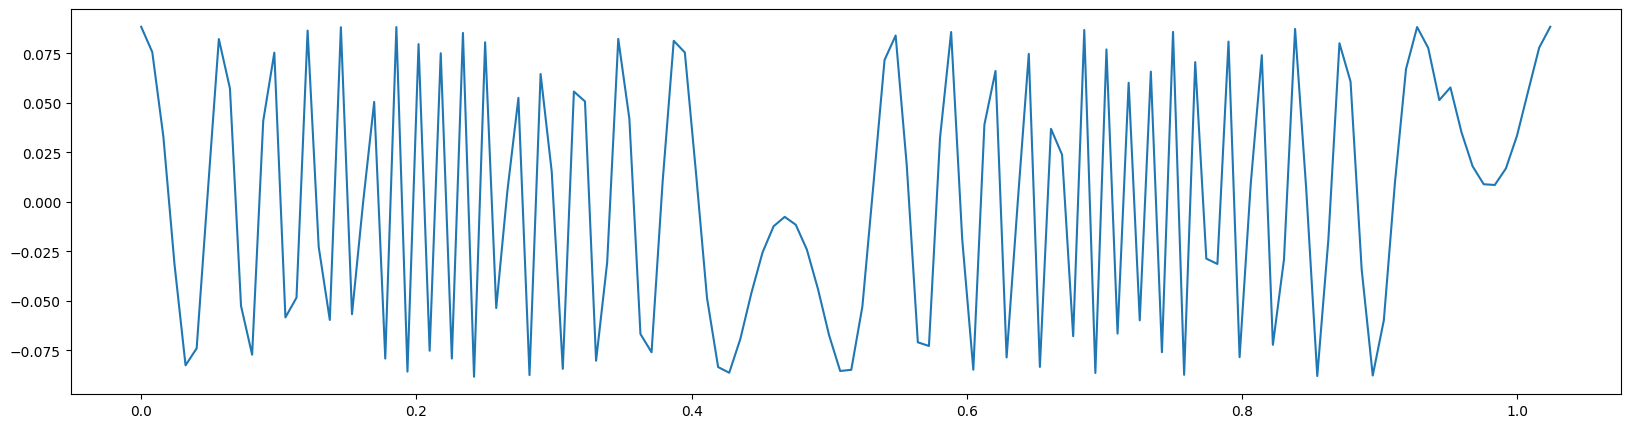

: 

In [64]:
def generate_time_axis(sf, bw, samples_per_chip):
    symbol_duration = 2**sf / bw
    time_axis = np.linspace(0, symbol_duration, samples_per_chip * 2**sf)


    return time_axis



def gen_freq_axis_1(symbol, sf, bw, time_axis):
    y_intercept = symbol * (bw / 2**sf)
    slope = bw**2/(2**sf)
    freq_axis = np.array([(slope * t + y_intercept) % bw for t in time_axis])
    return freq_axis

def gen_freq_axis_2(symbol, sf, bw, time_axis, samples_per_chip):
    freq_axis= np.array([])
    time = np.arange(0, 2*sf / bw, 1/samples_per_chip * 2**sf * 1/bw)
    for k in time:
        freq = ((symbol + k) % 2**sf) * (bw / (2**sf))
        freq_axis = np.append(freq_axis, freq)
    return freq_axis

def generate_downchirp_1(sf, bw, time_axis):
    y_intercept = 0
    slope = - bw**2/(2**sf)
    freq_axis = np.array([(slope * t + y_intercept) % bw for t in time_axis])
    return freq_axis  

def generate_downchirp_2(sf, bw, time_axis):
    freq_axis = np.array([])
    for k in range(0, len(time_axis)):
        freq = (bw - k) * (bw / 2**sf)
        freq_axis = np.append(freq_axis, freq)
    return freq_axis

def generate_signal(sf, freq, time_axis):
    coeff = 1 / (np.sqrt(2**sf))
    signal = np.array([coeff * np.exp( 1j * 2 * np.pi * freq[i] * time_axis[i]) for i in range(len(time_axis))])
    return signal

def demodulaatw(signal, downchirp):
    product = signal * downchirp
    frequency = np.fft.fft(product)
    obs_symbol = np.argmax(np.abs(frequency))
    return obs_symbol


time = generate_time_axis(7, 125, 1)
freqs_1 = gen_freq_axis_1(10, 7, 125, time)
freqs_2 = gen_freq_axis_2(0, 7, 125, time, 1)
plt.plot(time, freqs_1)

plt.figure(figsize=(20, 5))
signal_1 = generate_signal(7, freqs_1, time)
plt.plot(time, np.real(signal_1))
downchirp = generate_downchirp_1(7, 125, time)
dwnchrp_signal = generate_signal(7, downchirp, time)
obs_symbol = demodulaatw(signal_1, dwnchrp_signal)
print(obs_symbol)

errors = 0
for i in range(2**7):
    signal = generate_signal(7, gen_freq_axis_1(i, 7, 125, time), time)
    obs_symbol = demodulaatw(signal, dwnchrp_signal)
    if obs_symbol != i:
        errors += 1

print(errors)

# plt.plot(time, np.real(signal_2))

